# Classification algorithms

The objectives of this notebook are to learn and compare the basic model families in shallow machine learning classication problems.

We'll look at the following types of models: 

* Logistic regression,

* Nearest neighbours models, 
    
* Support vector machines,
    
* Decision Trees, and Ensemble models.
    
* Neural Networks (very briefly)

For each model, we will:

* Describe the key hyperparameters that control how these models learn.

* Visualize decision boundaries study how models make predictions.

* Discuss the properties of an appropriate predictive model.


## The dataset

First we'll import some data. I'm using an extract from the Rock Property Catalog, https://subsurfwiki.org/wiki/Rock_Property_Catalog

In [1]:
import pandas as pd

df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies_original.csv')
df.describe()

,RPC,Vp [m/s],Vs [m/s],Rho [g/cm³]
count,800.000000,800.000000,800.000000,752.000000
mean,102276.178750,3798.453532,2113.480238,2.316455
std,1537.850865,1114.387572,750.387638,0.255653
min,100031.000000,1490.711927,441.270000,1.750000
25%,101112.750000,3010.248889,1520.975000,2.117000
50%,102081.500000,3675.150000,2198.100000,2.390000
75%,103284.750000,4664.592178,2733.805000,2.530000
max,105090.000000,5993.000000,3665.000000,2.780000


We are going to drop the rows with missing values.

In [2]:
df.dropna(inplace=True)

We'll start our discussion of classification by using the logistic regression algorithm one a variable and two classes.

## Logistic regression

Logistic regression is similar to linear regression, but instead of predicting a continuous variable, it predicts whether something is true or false. It is a classification algorithm. 

Instead of fitting a line to the data, Logistic regression fits a logistic function (a.k.a sigmoid) to the data. The model then is a probability function used to classify new data.

$$f(x) = \frac{1}{1+e^{-(\textbf{wx}+b)}}$$

It has many uses in data analysis and machine learning, especially in data transformations. The curve goes from zero to one. It tells you the probability that a sample is a class of interest or not. Instead of using a least-squares type loss function, it uses a maximum likelihood function.

### EXERCISE

- Write a function called `logistic` that takes **x**, **w**, and b as arguments and returns the function evaluated at those values.

- Make a plot of the logistic function from x = -10 to 10.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, w=1, b=0):
    
    # YOUR CODE HERE

    return 

In [4]:
# YOUR CODE HERE


In [66]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, w=1, b=0):
    """Logistic function.
    Args:
        x (array or int): input
        w (float or array): the weights of the logistic
        b (float): the intercept (or bias)
    """
    term = np.exp(-(w * x + b))
    return 1 / (1 + term)

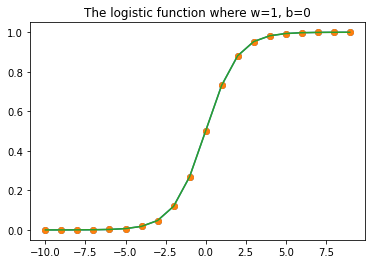

In [6]:
x = np.arange(-10, 10)
plt.plot(x, logistic(x), 'o-')
plt.title('The logistic function where w=1, b=0')

# Alternatively, we can use the expit function in scipy for this
from scipy.special import expit
plt.plot(x, logistic(x), 'o')
plt.plot(x, expit(x))

In [7]:
from ipywidgets import interact

@interact(w=(-3, 3, 0.1), b=(-10, 10, 1))
def show(w=1, b=0):
    x = np.arange(-10, 10)
    plt.plot(x, logistic(x, w, b), 'o-')
    plt.xlim(-12, 12)
    plt.ylim(-0.1, 1.1)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-3.0), IntSlider(value=0, descripti…

### The optimization in logit regression

In linear regression, we were **minimizing** the **mean squared error**, and solving this problem with a **closed form** solution (although it can be done with gradient descent).

Logistic regression is different. In this problem, `sklearn` is **maximizing** a different function, **maximum likelihood** (in fact it maximizes log-likelihood, but that's more of an implementation detail).

Maximum likelihood is computed like so:

$$ L = \prod_{i=1}^{N} f(x_i)^{y_i} \ (1 - f(x_i))^{(1 - y_i)} $$

That looks bad, but remember $y_i$ is always 0 or 1, so really the power term is just turning the other part 'on' or 'off'.

In [8]:
def max_likelihood(xi, yi):
    """Compute L for one data point, x_i."""
    return logistic(xi)**yi * (1 - logistic(xi))**(1 - yi)

max_likelihood(-3, 0)

0.9525741268224333

It would be fun to show a data point on the interactive plot, and show how L varies as you move the data point around (i.e. change xi or yi), or change the logistic.

**Note that there is no closed form solution to the maximization problem, so this has to be solved with something like gradient descent.**

## Make X and y

We are going to start with a 1-D feature space (Vp) and only two classes (shale and dolomite), and we'll build a logistic regression classifier to distinguish between those. Let access our DataFrame accordingly:

In [39]:
features = ['Vp [m/s]']  # A 1-D feature space.
classes = ['shale', 'dolomite']  # Two classes.
df_LR = df.loc[df['Lithology'].isin(classes)]

X = df_LR[features].values
y = df_LR['Lithology'].values

Let's look at the data distributed along the Vp dimension.

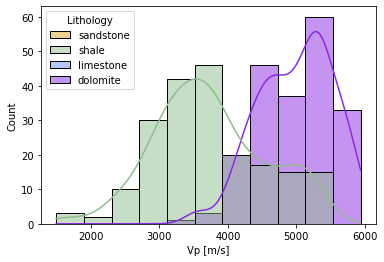

In [40]:
import seaborn as sns

# Create a custom color palette for seaborn.
palette = ['goldenrod', 'darkseagreen', 'cornflowerblue', 'blueviolet']
hue_order = df['Lithology'].unique()

_ = sns.histplot(data=df_LR, x='Vp [m/s]', kde=True, hue='Lithology', palette=palette, hue_order=hue_order)

Split the data into a training and validation set.

In [41]:
from sklearn.model_selection import train_test_split

X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X, y, test_size=0.2, random_state=32)

X_train_lr.shape, X_val_lr.shape

((320, 1), (80, 1))

## 1-D logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_lr, y_train_lr)

y_pred_lr = model.predict(X_val_lr)

We can now use `model.predict()` to perform our classifications, but if we choose we can also take it's learned coefficients to studied the logistic curve that we fitted to the data. The sigmoid alone, however does not provide the classification directly, but it's illustrative to inspect it relative to the data points

Text(0.5, 0, 'Vp')

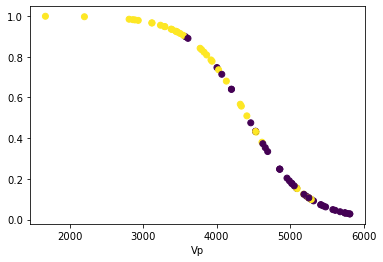

In [45]:
# Create our own logistic function from the learned model parameters of `model`.
y_test_lr = logistic(X_val_lr * model.coef_ + model.intercept_)
plt.scatter(X_val_lr, y_test_lr, c=y_val_lr=='shale')
plt.xlabel('Vp')

interactive(children=(Dropdown(description='cutoff', index=10, options=(0.0, 0.05, 0.1, 0.15000000000000002, 0…

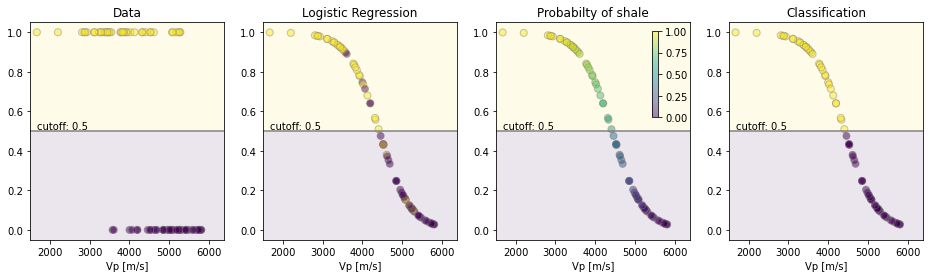

In [46]:
from ipywidgets import interact
from mlutils import logistic_plots

@interact(cutoff=np.arange(0, 1.0, 0.05))
def logistic_regression_plot(cutoff=0.5):
    logistic_plots(model, X_val_lr, y_val_lr, y_test_lr, cutoff)

### ❓ What does a more complex task look like?

We need to complexify the model in two ways:

- We'd like to predict more classes. How can this be achieved?
- We'd like to use more features. How does this change the logistic?

In [65]:
# Logistic regression and SVMs are implicitly binary classifiers.
# To approach a multi-class problem we need a strategy. There are two common ones:
# The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.
# The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.

# Using more features: need more weights: one for each feature.
# Skip this unless it comes up.
# Visualize a 2-feature problem.
def bivariate_logistic(x1, x2, w1=1, w2=1, b=0):
    """Bivariate logistic function. In fact, this would be implemented as vectors.
    """
    term = np.exp(-(w1*x1 + w2*x2 + b))
    return 1 / (1 + term)

@interact(w1=(-5, 5, 0.2), w2=(-5, 5, 0.2), b=(-20, 20, 1))
def show(w1=1, w2=1, b=0):
    x1, x2 = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
    plt.imshow(bivariate_logistic(x1, x2, w1, w2, b))
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0, step=0.2), FloatSlider(value…

## Adding more features and classes

Let's take a look at all the rows in `df` for the four classes in `Vp` vs `Rho` space.

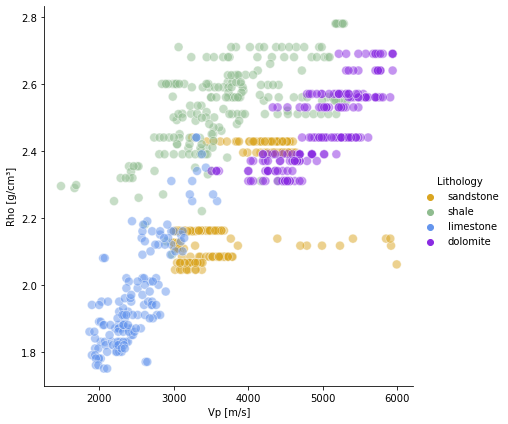

In [48]:
scatter = sns.relplot(data=df, x='Vp [m/s]', y='Rho [g/cm³]', hue='Lithology', s=80, alpha=0.5, height=6, 
                      palette=palette, hue_order=hue_order)

## Make X and y

In [49]:
features = ['Vp [m/s]', 'Rho [g/cm³]']  # A 2-D feature space. 
X = df[features].values  # Including all four classes.
y = df['Lithology']

## Split the data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the data

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

## Logistic regression

### EXERCISE

- Import the logistic regression classifier, again for good practice.

- Instantiate the classifier and assign it to the variable `model`.

- Train the model on the training data

- Make a prediction using the validation data.

Your code should look like, replacing the 🐍🐍🐍 with Python code:

```
from 🐍🐍🐍 import 🐍🐍🐍

model = 🐍🐍🐍
model.fit(🐍🐍🐍, 🐍🐍🐍)
y_pred = model.predict(🐍🐍🐍)
```

If you've done this correctly the plot in the following cell will show the predicted label inside the true label.

In [52]:
# YOUR CODE HERE


In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

Accuracy: 0.834


<AxesSubplot:>

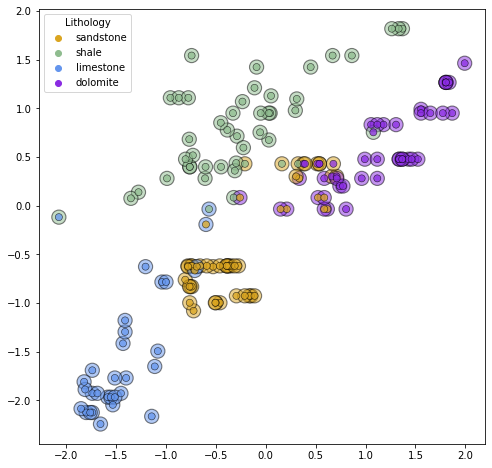

In [55]:
from sklearn.metrics import accuracy_score
from mlutils import validation_scatter

print(f'Accuracy: {accuracy_score(y_val, y_pred):0.3f}')
validation_scatter(X_val, y_val, y_pred, palette, hue_order)

<AxesSubplot:>

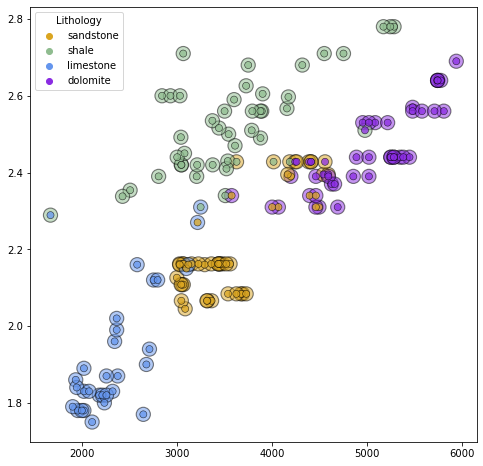

In [56]:
# To plot the data in its original units:
validation_scatter(X_val, y_val, y_pred, palette, hue_order, scaler=scaler)

## Plotting the decision regions

The cutoff we saw in the one-dimensional logistic regression is expressed as decision boundaries in 2-D. We can visualize these decision regions for our problem using the following function. Note, we aren't showing the training data in these plots, only showing the validation and predicted data points, other wise it would look very messy. But the influence of the training data can be seem in the shape of the decision boundaries.

<AxesSubplot:title={'center':'LogisticRegression   Accuracy: 0.834'}>

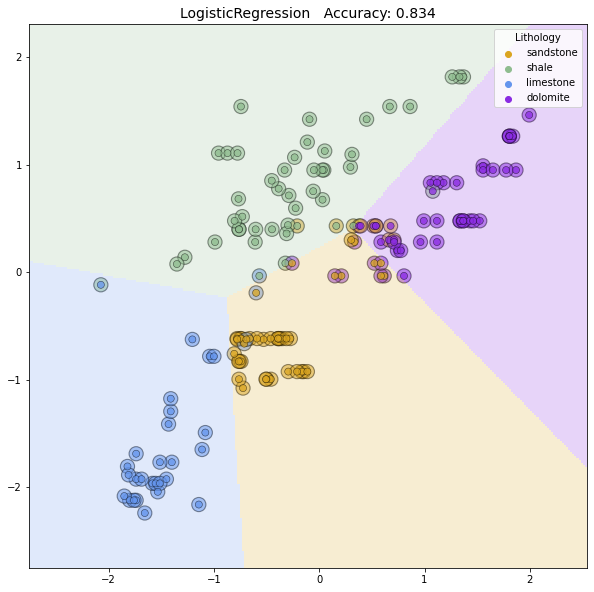

In [59]:
from mlutils import show_decision_regions

show_decision_regions(model, X_train, y_train, X_val, y_val, palette, hue_order)

## K-nearest neighbours

K-nearest neighbours (kNN) is a supervised learning algorithm that tries to classify a test point by calculating the probability of each of the classes within the `k` closest datapoints. For each test data point, this is done by calculating the distance between the test point and all the training points. The `k` closest points (neighbors) are selected and are their classes are counted as votes to make a class prediction. kNN is called a non-parameteric classifier because it doesn't learn any parameters from the training. It learns no simpler expression of the problem, it merely calculates and recalculates distances to all points in the training data everytime a test point is passed in?


### EXERCISE

- Create and train a `KNeighborsClassifier` using its default parameters in a similar way you did for LogisticRegression. You might need to search the scikit-learn website to find what module to import it from.

- Make a new prediction, called `y_pred` from your validation data.

- compute the accuracy score.


Your code should look like, replacing the 🐍🐍🐍 with Python code:

```
from 🐍🐍🐍 import 🐍🐍🐍

clf = KNeighborsClassifier()  
clf.fit(🐍🐍🐍, 🐍🐍🐍)
y_pred = clf.predict(🐍🐍🐍)
accuracy_score(🐍🐍🐍, 🐍🐍🐍)
```

In [60]:
# YOUR CODE HERE


In [61]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
accuracy_score(y_val, y_pred)

0.9536423841059603

Let's look at how the decision boundaries and accuracy changes for different values of k.

interactive(children=(Dropdown(description='k', index=2, options=(1, 3, 5, 10, 20, 30, 50, 100, 150), value=5)…

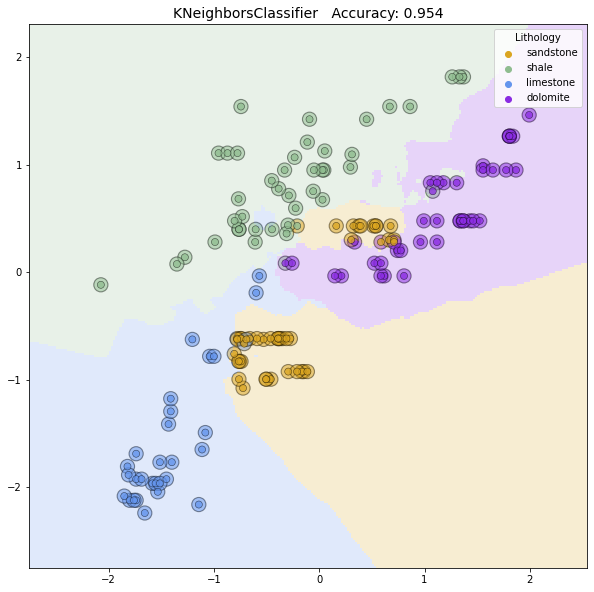

In [62]:
from ipywidgets import interact

@interact(k=[1, 3, 5, 10, 20, 30, 50, 100, 150])
def decision_boundaries(k=5):
    clf = KNeighborsClassifier(n_neighbors=k)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

### EXERCISE

- Do high or low values of `k` create a smoothing effect?
- For `k=100` how many times is sandstone being mistaken as shale?
- What value of `k` gives the highest accuracy?
- Does this model look like a good choice for our data?

## Support-vector machine (SVM)

The objective of the support vector machine alogorithm is to find a **hyperplane** that distinctly separates the classes in the feature space. 

So, for a one-dimensional feature space, a hyperplane is a dot. In a two-dimesional feature space, a hyperplane is a line. In a three-dimensional feature space a hyperplane is a plane. In higher-dimensional space a hyperplane is still called a hyperplane.

**Support vectors** are those data points that are closest to the hyperplanes and therefore influence the position and orientation of the decision boundary. If you delete a support vector, you will move the decision boundary. If you remove any point that isn't a support vector you will not change the boundary. 

## Linear SVM

### Hard margin

If the training data is linearly seperable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the decision boundary is defined to be the hyperplane that lies halfway in between.

### Soft margin

There are is no line that can perfectly separate the data, then there must be a tradeoff to be made. the tradeoff is between maximizing the margin and minimizing the error or being on the wrong side of the line (loss). 

The regularization parameter `C` controls this trade-off between margin expansion and loss reduction. Large values of `C` mean you want to minimize misclassification, and have a small margin. Small values of `C` mean you want to maintain a large margin at the expense of higher misclassification.

In [63]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)

accuracy_score(y_val, y_pred)

0.8543046357615894

interactive(children=(Dropdown(description='C', index=4, options=(0.005, 0.05, 0.1, 0.5, 1.0, 10, 100), value=…

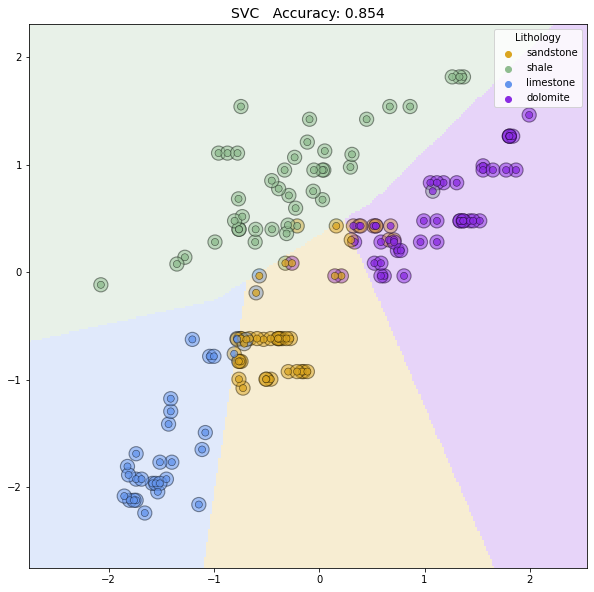

In [64]:
@interact(C=[0.005, 0.05, 0.1, 0.5, 1.0, 10, 100])
def decision_boundaries(C=1):
    clf = SVC(kernel='linear', C=C)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

## Non-linear SVM 

If we are not satified with the linear classification shown above, we may try a non-linear SVM method. The Non-linear SVM method effectively maps our data onto higher-dimensions than our original feature space, which makes it easier to find a hyperplane to separate our classes. 

However, instead of explicitly mapping our data points into a potentially huge and costly number of dimensions, non-linear SVM classifiers employ the so called **kernel trick** which applies nonlinear functions between points. 

There are several non-linear kernel functions that are used, but the `rbf` (radial basis function) kernel, which applies a gaussian function, is popular, and it is what Scikit-learn uses by default.

The key hyperparamters to consider when training with the `rbf` kernel is `C` and `gamma`:

* `C` trades off missclassification of the training data against the simpliciity of the decision boundary. A low `C` makes for smooth boundaries, a high `C` aims at classifying more points correctly and results in a more complicated boundaries. 

* `gamma` defines how far the influence of a single training example has. Low values of `gamma` mean 'far', and high values mean 'close'. The `gamma` parameter can be seen as the inverse of the radius of influence of samples selected by the model as support vectors

Here's an [example](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py) in the Scikit-learn documentation comparing these two hyperparameters;

In [62]:
from sklearn.svm import SVC

svc = SVC(C=1)  # The default kernel is 'rbf' (which is a non-linear one).

svc.fit(X_val, y_val)

y_pred = svc.predict(X_val)

accuracy_score(y_val, y_pred)

0.8675496688741722

interactive(children=(Dropdown(description='C', index=3, options=(0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000.…

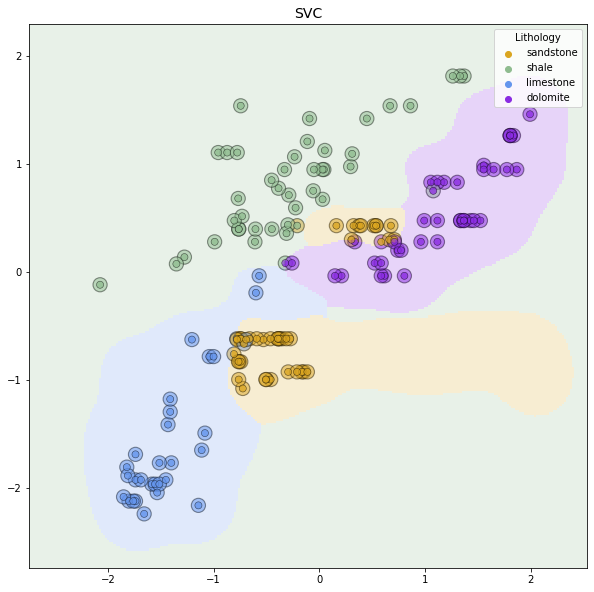

In [63]:
@interact(C=[0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 1e4, 1e8])
def decision_boundaries(C=1):
    clf = SVC(kernel='rbf', C=C, gamma=10)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

### EXERCISE

- What value of `C` returns the highest accuracy?
- Choose a value of `C` that appears to yield an appropriate model.
- Study the effect of `gamma` using the following values: `0.1, 1, 10, 100`.
- What combination of `C` and `gamma` is a good fit?
- How does this compare to kNN?

In [71]:
from ipywidgets import widgets

gamma_slider = widgets.FloatLogSlider(min=-3, max=3, step=0.2)
C_slider = widgets.FloatLogSlider(min=-3, max=3, step=0.2)

@interact(gamma=gamma_slider, C=C_slider)
def decision_boundaries(gamma=1, C =1):
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)
    plt.show()

interactive(children=(FloatLogSlider(value=1.0, description='gamma', max=3.0, min=-3.0, step=0.2), FloatLogSli…

## Decision trees

[Decision trees](https://scikit-learn.org/stable/modules/tree.html) are a supervised learning method whereby the goal is to predict the class of a target variable by learning simple decision rules inferred from the data features. 

The structure of a decision is a set of `if-then-else` rules. Each decision asks an `if` statement of one and only one of the features at a time. The deeper the tree, the more complex the decision rules become and the fitter the model. If decision trees are too deep, they are prone to overfitting the training data.

One recourse against overfitting is to limit the `max_depth` of the tree. The `max_depth` is maximum the number of `if` statements a data point will be asked. Another way to avoid overfitting is to increase the `min_samples_leaf`, minimum samples per leaf, to ensure that multiple samples will inform every decision in the tree. A decision that is informed by a very small number training points is not a decision fit for general purpose (overfit). 

Try `min_samples_leaf` greater than or equal to 5. Try `max_depth`= 3, see how it fits the data, and then increase from there.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

In [ ]:
from mlutils import lithology_tree

lithology_tree(clf, features)

In [ ]:
@interact(max_depth=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50])
def decision_boundaries(max_depth=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=5)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)
    plt.show()

### EXERCISE

- Study the effect of `max_depth` on the decision boundaries.
- At what depth does the decision surface stay approximately the same.
- Increase `min_samples_leaf` and notice the effect at different values of `max_depth`
- Can you choose two values that give the highest accuracy score?
- Does this model look like a good choice for our problem?



## Random forests and ensemble methods

Random forests is type of ensemble methods combine many weak learners together, in this case decision trees, to create a stronger predictive model.  

For a classification tasks, the output of the random forest is the class chosen by the most number of decision trees.

The training algorithm for random forests applies two techniques that help reduce overfitting and create an ensembles of effective weak learners. The way to achieve this is to create diversity in the forest. This is done by only showing **some** of the data to each tree, and no two trees ever see the same data. 

The data resampling procedure is used for this is called [bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating) or "Bagging".

The key hyperparameters for the RandomForestClassifier are the same as the decision tree, but also the number of trees `n_estimators` which has the default of 100.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3).fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

In [ ]:
@interact(n_estimators=[1, 5, 10, 20, 50, 100, 150],
          max_depth=np.arange(2, 10), 
          min_samps_leaf=np.arange(1, 6))
def decision_boundaries(n_estimators, max_depth=3, min_samps_leaf=3):
    clf = RandomForestClassifier(n_estimators, max_depth=max_depth, min_samples_leaf=min_samps_leaf)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)
    plt.show()

### EXERCISE

- Study the effect of `n_estimators` on the output.
- Adjust the parameters to see how they trade off between one another.
- Set `n_estimators` to `100` and `min_samples_leaf` to `3`. What value of `max_depth` gives the highest accuracy?
- Bonus: read about [sklearn.ensemble.ExtraTreesClassifier()](https://scikit-learn.org/stable/modules/ensemble.html#forest) and try implementing that.

## Boosted trees

[Gradient boosted decision trees (GBDT)](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) are similar to Random Forests in the sense they are comprised on an ensemble of trees each of which is a weak learner, but they differ in the way that the trees are built. Random Forests use `bagging` as described above, whereas gradient boosted trees use a method called `boosting`.

How gradient boosting works

1. A loss function to be optimized
2. A weak learner to make predictions
3. An additive model to add more weak learners to mimimize the loss function.

With Random Forests, all trees are created simultaneously. With Gradient Boosting, trees are added one at a time, and existing trees in the model are not modified. 

Using a loss function, a gradient descent procedure is used to minimize the loss when new trees are added.

The key hyperparameters are the same as for Random Forests, except `n_estimators` refers to the number of boosting stages to perform (which amounts to the same as the total number of trees).

The two most important parameters of this estimator are `n_estimators` and `learning_rate` shrinks the contribution of each tree.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

In [ ]:
@interact(n_estimators=np.arange(1, 150, 10), learning_rate=[0.001, 0.01, 0.1, 0.2, 0.3, 0.4])
def decision_boundaries(n_estimators=20, learning_rate=0.1):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

### EXERCISE

- Fix the learning rate at 0.1 in the plot above. What is the value of `n_estimators` where there is no improvement in accuracy.
- What is happening for any value of `n_estimators` above this number?


## Neural networks

Neural networks are useful for a variety supervised machine learning classification tasks. The neural network classifier available in scikit-learn is called a Multi-layer Perceptron classifier. 

Neural networks can be powerful classifiers indeed, but there are many hyperparameters to choose from, which means you typically need a very large amount of data, and compute time to find the optimal ones. 

We will include the `MLPClassifier here` for completeness, but won't delve into the terminology comprehensively.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[10, 10])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

In [ ]:
@interact(hl1=np.arange(2, 15, 1))
def decision_boundaries(hl1=3):
    clf = MLPClassifier(hidden_layer_sizes=[hl1],
                    learning_rate='constant',
                    alpha=0.001,
                    max_iter=5000,
                    solver='adam',
                    random_state=42,
                   )
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

### EXERCISE

- What effect does increasing the number of nodes in the hidden layer `hl1` of the network have?
- Trying adding a second number to the list of `hidden_layer_sizes=[hl1]` to add more nodes. Does this add or remove complexity
- How does this classifier compare to the others we've seen?

---

## Choosing the right estimator

Different estimators are better suited for different types of data and different problems. For a classifier comparison (below) check the source code [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png"></img>

---


Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

This is a good place to start ([here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) is a clickable version):

<img src="https://scikit-learn.org/stable/_static/ml_map.png"></img>

---


###  [Check out this paper with a comparison of many classifiers](https://arxiv.org/abs/1708.05070)

## Summary

- Choosing a model mean you are making an interpretation.
- You need to know the key hyperparameters that effect how models learn.
- KNN and SVM models have few hyperparameters.
- Decision Trees and Neural Networks have more hyperparameters so they can be harder to "tune"
- All models can be underfit and overfit to your data.

## Next steps

- Try some of the other classifiers that we didn't feature here.
- Try different training and testing set sizes.
- Swap in your own data set.
- Beyond accuracy - Classification Reports, Confusion Matricies, ROC-AUC.
- Beyond the visual - tuning hyperparameters in a rigorous way. 